Piyush Ghotkar      Roll No.:58

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [2]:
col_names = ['outlook','temp','humidity','wind','play']
# load dataset
dataset1 = pd.read_csv("play_tennis.csv", header=None, names=col_names)

In [3]:
dataset=dataset1[1:]
dataset

,outlook,temp,humidity,wind,play
D1,Sunny,Hot,High,Weak,No
D2,Sunny,Hot,High,Strong,No
D3,Overcast,Hot,High,Weak,Yes
D4,Rain,Mild,High,Weak,Yes
D5,Rain,Cool,Normal,Weak,Yes
D6,Rain,Cool,Normal,Strong,No
D7,Overcast,Cool,Normal,Strong,Yes
D8,Sunny,Mild,High,Weak,No
D9,Sunny,Cool,Normal,Weak,Yes
D10,Rain,Mild,Normal,Weak,Yes


In [4]:
encoder=LabelEncoder() 
outlook_e=encoder.fit_transform(dataset['outlook'])
temp_e=encoder.fit_transform(dataset['temp'])
humidity_e=encoder.fit_transform(dataset['humidity'])
wind_e=encoder.fit_transform(dataset['wind'])
play_e=encoder.fit_transform(dataset['play'])

In [5]:
# get the list of tuples from two lists.  
# and merge them by using zip().
tuple=list(zip(outlook_e,temp_e,humidity_e,wind_e))

#creating dataframe for encoded features
x_train=pd.DataFrame(tuple,columns = ['outlook_e', 'temp_e','humidity_e','wind_e'])
y_train=pd.DataFrame(play_e,columns=['play_e'])

In [6]:
model = DecisionTreeClassifier(criterion='entropy')
model=model.fit(x_train,y_train)

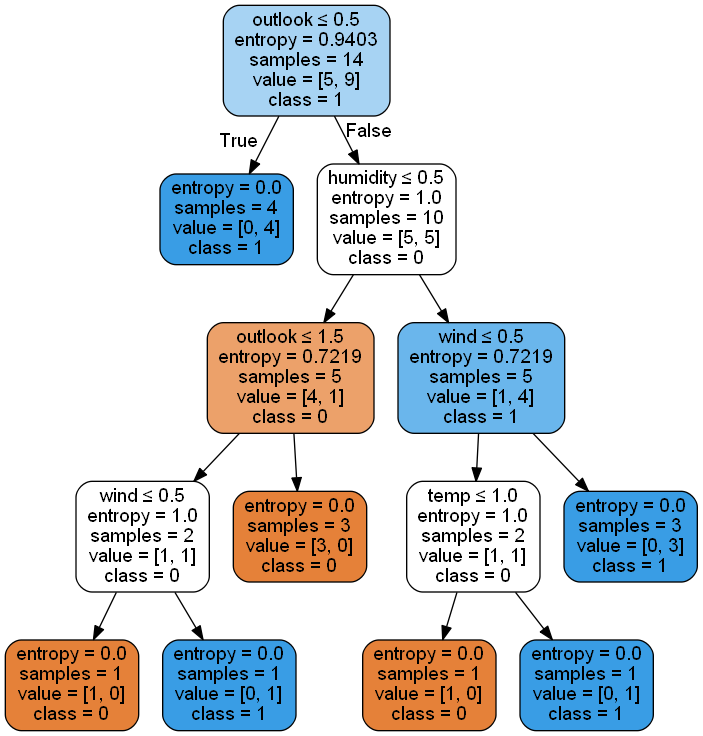

In [20]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('play.png')
Image(graph.create_png())

In [21]:
import graphviz

In [22]:
from sklearn import tree
dot_data= tree.export_graphviz(model,out_file=None)
graph= graphviz.Source(dot_data)

In [19]:
graph.render("Decision Tree(tennis play)")

'Decision Tree(tennis play).pdf'